In [1]:
import csv
import numpy as np
import random
import torch
import torch.utils.data
import matplotlib.pyplot as plt
import pandas as pd
import math

**THE FOLLOWING IS THE FIRST DATASET USED, WHICH IS IMBALANCED.**

In [2]:
header = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'DiabetesPedigreeFunction', 'Age', 'Outcome']
##### I uploaded the diabetes csv to a public github so we can all load the file easily
url = 'https://raw.githubusercontent.com/ayshon/diabetes_dataset/master/diabetes.csv'
df1 = pd.read_csv(url)

In [3]:
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [4]:
# convert data to numpy array
dataset = np.array(df1)

In [5]:
# display numpy dataset
print(dataset)
print(dataset[0])
print(dataset.shape)

[[2.00e+00 1.38e+02 6.20e+01 ... 1.27e-01 4.70e+01 1.00e+00]
 [0.00e+00 8.40e+01 8.20e+01 ... 2.33e-01 2.30e+01 0.00e+00]
 [0.00e+00 1.45e+02 0.00e+00 ... 6.30e-01 3.10e+01 1.00e+00]
 ...
 [6.00e+00 8.50e+01 7.80e+01 ... 3.82e-01 4.20e+01 0.00e+00]
 [0.00e+00 1.29e+02 1.10e+02 ... 3.19e-01 2.60e+01 1.00e+00]
 [2.00e+00 8.10e+01 7.20e+01 ... 5.47e-01 2.50e+01 0.00e+00]]
[2.00e+00 1.38e+02 6.20e+01 3.50e+01 0.00e+00 3.36e+01 1.27e-01 4.70e+01
 1.00e+00]
(2000, 9)


In [6]:
# create a dictionary for easy acces to field index  
# loop through field names and populate a dictionary with indices
fields = {}

# cycle through the first row (i.e. fields) 
for i in range(len(header)):
    fields[header[i]] = i

print(fields)

{'Pregnancies': 0, 'Glucose': 1, 'BloodPressure': 2, 'SkinThickness': 3, 'Insulin': 4, 'BMI': 5, 'DiabetesPedigreeFunction': 6, 'Age': 7, 'Outcome': 8}


In [7]:
# calculate the glucose level distributions percentages for people with diabetes
glucose_percents = []

# get indices for people with diabetes
outcome_indices = np.where(dataset[:,fields['Outcome']] == 1)
outcome_indices = list(outcome_indices[0])

# compute percentage of people with glucose is less than 100

glucose_less_than_100 = np.where(dataset[:,fields['Glucose']] < 100)
glucose_less_than_100 = list(glucose_less_than_100[0])

percent = 100*len(set(outcome_indices) & set(glucose_less_than_100))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level less than 100')
glucose_percents.append(percent)

# compute percentage that has diabetes and glucose is over 100 and below 120
glucose_greater_than = np.where(dataset[:,fields['Glucose']] >= 100)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(dataset[:,fields['Glucose']] < 120)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 100 and less than 120')
glucose_percents.append(percent)


# compute percentage that has diabetes and glucose is over 120 and below 140
glucose_greater_than = np.where(dataset[:,fields['Glucose']] >= 120)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(dataset[:,fields['Glucose']] < 140)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 120 and less than 140')
glucose_percents.append(percent)

# compute percentage that has diabetes and glucose is over 140 and below 160
glucose_greater_than = np.where(dataset[:,fields['Glucose']] >= 140)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(dataset[:,fields['Glucose']] < 160)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 140 and less than 160')
glucose_percents.append(percent)

# compute percentage that has diabetes and glucose is over 160
glucose_greater_than = np.where(dataset[:,fields['Glucose']] >= 160)
glucose_greater_than = list(glucose_greater_than[0])

percent = 100*len(set(outcome_indices) & set(glucose_greater_than))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 160')
glucose_percents.append(percent)

6.29 % of people with diabetes have a glucose level less than 100
18.42 % of people with diabetes have a glucose level greater than or equal to 100 and less than 120
24.27 % of people with diabetes have a glucose level greater than or equal to 120 and less than 140
19.01 % of people with diabetes have a glucose level greater than or equal to 140 and less than 160
32.02 % of people with diabetes have a glucose level greater than or equal to 160


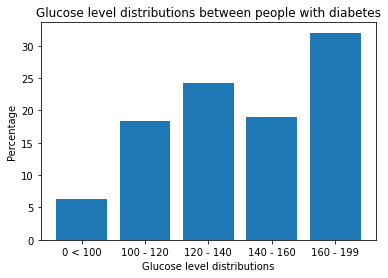

In [8]:
# plot bar graph of survival by gender
pos = range(len(glucose_percents))
plt.bar(pos, glucose_percents, align = 'center')
plt.xticks(pos,['0 < 100', '100 - 120', '120 - 140', '140 - 160', '160 - 199'])
plt.title('Glucose level distributions between people with diabetes')
plt.xlabel('Glucose level distributions')
plt.ylabel('Percentage')
plt.show()

In [9]:
# get indices for people with diabetes
field1 = 'Outcome'
field1_val = 1
diabetic_indices = np.where(dataset[:,fields[field1]] == field1_val)
diabetic_indices = list(diabetic_indices[0])

# get indices for people without diabetes
field1 = 'Outcome'
nondiabetic_indices = np.where(dataset[:,fields[field1]] == 0)
nondiabetic_indices = list(nondiabetic_indices[0])

print(len(diabetic_indices))
print(len(nondiabetic_indices))

684
1316


In [10]:
import math
np.random.seed(1000)

np.random.shuffle(dataset)
dataset_length = dataset.shape[0]
# print(dataset_length)

# split dataset into 70% training, 15% validation, and 15% testing
train_length = math.floor(dataset_length * 0.7)
valid_length = math.ceil(dataset_length * 0.15)
test_length = dataset_length - train_length - valid_length

train_set_np = dataset[:train_length]
valid_set_np = dataset[train_length: train_length + valid_length]
test_set_np = dataset[train_length + valid_length:]

# convert numpy arrays into pytorch tensor
train_set = torch.from_numpy(train_set_np)
valid_set = torch.from_numpy(valid_set_np)
test_set = torch.from_numpy(test_set_np)

print(len(train_set))
print(len(valid_set))
print(len(test_set))

1400
300
300


In [11]:
# loads the training and validation data into data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=batch_size, shuffle=True)

**THE FOLLOWING IS FOR THE UPDATED DATASET WHICH NOW HAS MORE ENTRIES AND WILL BE BALANCED**

In [12]:
header = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'DiabetesPedigreeFunction', 'Age', 'Outcome']
##### I uploaded the diabetes csv to a public github so we can all load the file easily
url = 'https://raw.githubusercontent.com/ayshon/diabetes_dataset/master/dataset.csv'
df3 = pd.read_csv(url)
df3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
2763,10,101,76,48,180,32.9,0.171,63,0
2764,2,122,70,27,0,36.8,0.340,27,0
2765,5,121,72,23,112,26.2,0.245,30,0
2766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
# convert data to numpy array
imabalanced_dataset = np.array(df3)

In [14]:
# display numpy dataset
print(imabalanced_dataset)
print(imabalanced_dataset.shape)

[[2.00e+00 1.38e+02 6.20e+01 ... 1.27e-01 4.70e+01 1.00e+00]
 [0.00e+00 8.40e+01 8.20e+01 ... 2.33e-01 2.30e+01 0.00e+00]
 [0.00e+00 1.45e+02 0.00e+00 ... 6.30e-01 3.10e+01 1.00e+00]
 ...
 [5.00e+00 1.21e+02 7.20e+01 ... 2.45e-01 3.00e+01 0.00e+00]
 [1.00e+00 1.26e+02 6.00e+01 ... 3.49e-01 4.70e+01 1.00e+00]
 [1.00e+00 9.30e+01 7.00e+01 ... 3.15e-01 2.30e+01 0.00e+00]]
(2768, 9)


**The following code is for adding more diabetic patients to the dataset because there are many more non-diabetic patients. We will balance the dataset by duplicating patients with diabetes, just like what was done in lab 5.**

In [15]:
# get indices for people with diabetes
field1 = 'Outcome'
field1_val = 1
diabetic_indices = np.where(imabalanced_dataset[:,fields[field1]] == field1_val)
diabetic_indices = list(diabetic_indices[0])
print(len(diabetic_indices))
print(diabetic_indices)

952
[0, 2, 3, 11, 16, 20, 24, 28, 33, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72, 78, 84, 88, 93, 99, 100, 109, 110, 111, 114, 115, 116, 120, 124, 125, 128, 129, 130, 131, 132, 143, 152, 154, 155, 159, 164, 165, 170, 171, 175, 177, 179, 185, 186, 187, 188, 189, 192, 193, 195, 197, 198, 199, 206, 207, 209, 213, 214, 215, 216, 218, 219, 220, 221, 227, 230, 231, 235, 236, 237, 238, 242, 243, 245, 254, 255, 259, 261, 264, 266, 269, 270, 276, 280, 283, 284, 287, 291, 292, 293, 296, 298, 300, 301, 303, 306, 308, 309, 312, 314, 317, 319, 321, 322, 323, 326, 328, 332, 337, 338, 339, 349, 355, 356, 357, 359, 360, 363, 366, 369, 370, 375, 378, 386, 387, 388, 391, 394, 397, 399, 400, 402, 404, 406, 408, 409, 414, 415, 417, 419, 424, 425, 427, 429, 435, 440, 443, 444, 445, 448, 451, 455, 458, 468, 476, 480, 484, 485, 493, 498, 502, 506, 510, 515, 516, 523, 535, 539, 540, 541, 542, 545, 546, 560, 561, 569, 577, 579, 580, 584, 586, 588, 590, 592, 595, 598, 603, 604, 606, 611, 612, 614, 618, 

In [16]:
# get indices for people without diabetes
field3 = 'Outcome'
field3_val = 0
nondiabetic_indices = np.where(imabalanced_dataset[:,fields[field3]] == field3_val)
nondiabetic_indices = list(nondiabetic_indices[0])
print(len(nondiabetic_indices))
print(nondiabetic_indices)

1816
[1, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 40, 41, 42, 44, 46, 47, 49, 50, 51, 52, 54, 55, 57, 58, 59, 60, 62, 63, 65, 67, 68, 69, 71, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 106, 107, 108, 112, 113, 117, 118, 119, 121, 122, 123, 126, 127, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 146, 147, 148, 149, 150, 151, 153, 156, 157, 158, 160, 161, 162, 163, 166, 167, 168, 169, 172, 173, 174, 176, 178, 180, 181, 182, 183, 184, 190, 191, 194, 196, 200, 201, 202, 203, 204, 205, 208, 210, 211, 212, 217, 222, 223, 224, 225, 226, 228, 229, 232, 233, 234, 239, 240, 241, 244, 246, 247, 248, 249, 250, 251, 252, 253, 256, 257, 258, 260, 262, 263, 265, 267, 268, 271, 272, 273, 274, 275, 277, 278, 279, 281, 282, 285, 286, 288, 289, 290, 294, 295, 297, 299, 302, 304, 305, 307, 310, 311, 313, 315, 316, 318, 320, 324, 325, 327, 329, 330, 331, 333, 334,

In [17]:
# Put diabetics into one numpy array and nondiabetics into nondiabetics
diabetics = imabalanced_dataset[diabetic_indices,:]
nondiabetics = imabalanced_dataset[nondiabetic_indices,:]

# get the number of diabetics and non diabetics to find ratio of non diabetics to diabetics
num_of_diabetics = len(diabetics)
num_of_nondiabetics = len(nondiabetics)
imbalance_ratio = num_of_nondiabetics/num_of_diabetics
imabalanced_dataset_length = len(imabalanced_dataset)

print(num_of_diabetics)
print(num_of_nondiabetics)
print(imabalanced_dataset_length)
print(imbalance_ratio)

num_of_diabetics_to_add = math.floor(num_of_diabetics * (imbalance_ratio - 1))
print(num_of_diabetics_to_add)

diabetics_to_add = diabetics[:num_of_diabetics_to_add]

952
1816
2768
1.9075630252100841
864


In [18]:
balanced_dataset = np.concatenate((imabalanced_dataset,diabetics_to_add))
print(len(balanced_dataset))

3632


In [19]:
# Get the amount of diabetics and non diabetics to confirm the amount of diabetics vs non diabetics

diabetic_indices_2 = np.where(balanced_dataset[:,fields['Outcome']] == 1)
diabetic_indices_2 = list(diabetic_indices_2[0])
print(len(diabetic_indices_2))
print(diabetic_indices_2)
# get indices for people without diabetes
nondiabetic_indices_2 = np.where(balanced_dataset[:,fields['Outcome']] == 0)
nondiabetic_indices_2 = list(nondiabetic_indices_2[0])
print(len(nondiabetic_indices_2))
print(nondiabetic_indices_2)

1816
[0, 2, 3, 11, 16, 20, 24, 28, 33, 37, 38, 39, 43, 45, 48, 53, 56, 61, 64, 66, 70, 72, 78, 84, 88, 93, 99, 100, 109, 110, 111, 114, 115, 116, 120, 124, 125, 128, 129, 130, 131, 132, 143, 152, 154, 155, 159, 164, 165, 170, 171, 175, 177, 179, 185, 186, 187, 188, 189, 192, 193, 195, 197, 198, 199, 206, 207, 209, 213, 214, 215, 216, 218, 219, 220, 221, 227, 230, 231, 235, 236, 237, 238, 242, 243, 245, 254, 255, 259, 261, 264, 266, 269, 270, 276, 280, 283, 284, 287, 291, 292, 293, 296, 298, 300, 301, 303, 306, 308, 309, 312, 314, 317, 319, 321, 322, 323, 326, 328, 332, 337, 338, 339, 349, 355, 356, 357, 359, 360, 363, 366, 369, 370, 375, 378, 386, 387, 388, 391, 394, 397, 399, 400, 402, 404, 406, 408, 409, 414, 415, 417, 419, 424, 425, 427, 429, 435, 440, 443, 444, 445, 448, 451, 455, 458, 468, 476, 480, 484, 485, 493, 498, 502, 506, 510, 515, 516, 523, 535, 539, 540, 541, 542, 545, 546, 560, 561, 569, 577, 579, 580, 584, 586, 588, 590, 592, 595, 598, 603, 604, 606, 611, 612, 614, 618,

In [20]:
# calculate the glucose level distributions percentages for people with diabetes
glucose_percents_2 = []

# get indices for people with diabetes
outcome_indices = np.where(balanced_dataset[:,fields['Outcome']] == 1)
outcome_indices = list(outcome_indices[0])

# compute percentage of people with glucose is less than 100

glucose_less_than_100 = np.where(balanced_dataset[:,fields['Glucose']] < 100)
glucose_less_than_100 = list(glucose_less_than_100[0])

percent = 100*len(set(outcome_indices) & set(glucose_less_than_100))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level less than 100')
glucose_percents_2.append(percent)

# compute percentage that has diabetes and glucose is over 100 and below 120
glucose_greater_than = np.where(balanced_dataset[:,fields['Glucose']] >= 100)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(balanced_dataset[:,fields['Glucose']] < 120)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 100 and less than 120')
glucose_percents_2.append(percent)


# compute percentage that has diabetes and glucose is over 120 and below 140
glucose_greater_than = np.where(balanced_dataset[:,fields['Glucose']] >= 120)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(balanced_dataset[:,fields['Glucose']] < 140)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 120 and less than 140')
glucose_percents_2.append(percent)

# compute percentage that has diabetes and glucose is over 140 and below 160
glucose_greater_than = np.where(balanced_dataset[:,fields['Glucose']] >= 140)
glucose_greater_than = list(glucose_greater_than[0])

glucose_less_than = np.where(balanced_dataset[:,fields['Glucose']] < 160)
glucose_less_than = list(glucose_less_than[0])

glucose_between = set(glucose_greater_than) & set(glucose_less_than)

percent = 100*len(set(outcome_indices) & set(glucose_between))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 140 and less than 160')
glucose_percents_2.append(percent)

# compute percentage that has diabetes and glucose is over 160
glucose_greater_than = np.where(balanced_dataset[:,fields['Glucose']] >= 160)
glucose_greater_than = list(glucose_greater_than[0])

percent = 100*len(set(outcome_indices) & set(glucose_greater_than))/len(outcome_indices)
print(round(percent,2), '% of people with diabetes have a glucose level greater than or equal to 160')
glucose_percents_2.append(percent)

6.11 % of people with diabetes have a glucose level less than 100
19.22 % of people with diabetes have a glucose level greater than or equal to 100 and less than 120
23.95 % of people with diabetes have a glucose level greater than or equal to 120 and less than 140
19.05 % of people with diabetes have a glucose level greater than or equal to 140 and less than 160
31.66 % of people with diabetes have a glucose level greater than or equal to 160


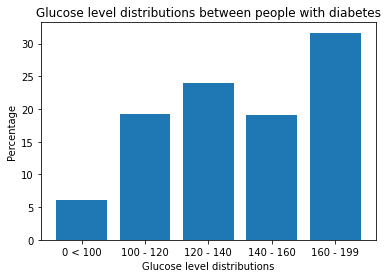

In [21]:
# plot bar graph of survival by gender
pos = range(len(glucose_percents_2))
plt.bar(pos, glucose_percents_2, align = 'center')
plt.xticks(pos,['0 < 100', '100 - 120', '120 - 140', '140 - 160', '160 - 199'])
plt.title('Glucose level distributions between people with diabetes')
plt.xlabel('Glucose level distributions')
plt.ylabel('Percentage')
plt.show()

In [22]:
import math
np.random.seed(1000)

np.random.shuffle(balanced_dataset)
balanced_dataset_length = balanced_dataset.shape[0]
# print(dataset_length)

# b_ for balanced
# split dataset into 70% training, 15% validation, and 15% testing
b_train_length = round(balanced_dataset_length * 0.7)
b_valid_length = round(balanced_dataset_length * 0.15)
b_test_length = balanced_dataset_length - train_length - valid_length

b_train_set_np = balanced_dataset[:b_train_length]
b_valid_set_np = balanced_dataset[b_train_length: b_train_length + b_valid_length]
b_test_set_np = balanced_dataset[b_train_length + b_valid_length:]

# convert numpy arrays into pytorch tensor
b_train_set = torch.from_numpy(b_train_set_np)
b_valid_set = torch.from_numpy(b_valid_set_np)
b_test_set = torch.from_numpy(b_test_set_np)

print(len(b_train_set))
print(len(b_valid_set))
print(len(b_test_set))

2542
545
545


In [23]:
# loads the training and validation data into data loaders
batch_size = 64

b_train_loader = torch.utils.data.DataLoader(b_train_set, batch_size=batch_size, shuffle=True)
b_valid_loader = torch.utils.data.DataLoader(b_valid_set, batch_size=batch_size, shuffle=True)
b_test_loader = torch.utils.data.DataLoader(b_test_set, batch_size=batch_size, shuffle=True)

In [24]:
## LINEAR REGRESSION BASE MODEL

In [25]:
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F

In [26]:
# Very simple baseline model, our neural network should surpass this
class baselineModel(nn.Module):
  def __init__(self, input_size, output_size):
        super(baselineModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
        x = self.linear(x)    
        out = torch.sigmoid(x)
        return out

**THE FOLLOWING IS THE BASELINE MODEL TRAINING AND TESTING ON THE IMBALANCED DATASET.**

In [27]:
# CONVERTING NP ARRAYS TO FLOAT 
# SPLITS THE INPUTS AND THE LABELS
# x_train_set is what will be given to the model
x_set_param = train_set_np[:, :8]
print(x_set_param.shape)
x_train = np.array(x_set_param,dtype=np.float32)
x_train_set = torch.from_numpy(x_train)

# THESE ARE THE LABELS FOR THE TRAIN SET
y_set_param = train_set_np[:, [8]]
print(y_set_param.shape)
y_train = np.array(y_set_param,dtype=np.float32)
# this is what will be given to the model
y_train_set = torch.from_numpy(y_train)

(1400, 8)
(1400, 1)


In [28]:
model = baselineModel(8,1)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr = 0.001) 

# THIS TAKES IN ALL TRAIN SET ENTRIES AND PREDICTS THEIR OUTPUTS 
# THEN UPDATES WEIGHTS AND REPEATS 2000 TIMES
# SO BATCH SIZE IS TRAINING SET SIZE AND EPOCH IS 2000
for epoch in range(2000): 
    # Forward pass 
      out = model(x_train_set)
      #print(out)
      loss = criterion(out, y_train_set) # compute the total loss
      loss.backward()               # backward pass (compute parameter updates)
      optimizer.step()              # make the updates for each parameter
      optimizer.zero_grad()         # a clean up step for PyTorch

      if (epoch+1) % 200 == 0:
        print('epoch %d, Loss: %f' % (epoch +1, loss.data))

epoch 200, Loss: 0.316984
epoch 400, Loss: 0.313213
epoch 600, Loss: 0.310609
epoch 800, Loss: 0.273721
epoch 1000, Loss: 0.232942
epoch 1200, Loss: 0.199101
epoch 1400, Loss: 0.194243
epoch 1600, Loss: 0.190485
epoch 1800, Loss: 0.187323
epoch 2000, Loss: 0.184564


In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd

In [30]:
# CONVERTING TEST ARRAY TO FLOAT
# SPLITS TEST INPUTS AND LABELS
x_test_param = test_set_np[:, :8]
print(x_test_param.shape)
x_test = np.array(x_test_param,dtype=np.float32)
x_test_set = torch.from_numpy(x_test)

y_test_param = test_set_np[:, [8]]
print(y_test_param.shape)
y_test = np.array(y_test_param,dtype=np.float32)
y_test_set = torch.from_numpy(y_test)

(300, 8)
(300, 1)


In [31]:
print(np.count_nonzero(y_test_param == 1))
print(np.count_nonzero(y_test_param == 0))

# The test set has 207 counts of non-diabetic and 93 diabetic individuals

93
207


Final accuracy of baseline model:  0.7766666666666666


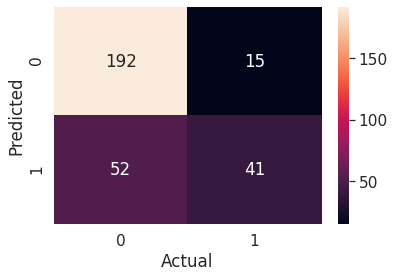

In [32]:
# ACCURACY OF THE BASE MODEL
pred = []
output = [] # store ALL paramters to output array, then convert to csv for easier read
with torch.no_grad():
  for item in x_test_set:
    temp = item.tolist()
    y_pred = model(item)
    pred.append(np.round(y_pred).item())
    
    temp.append(np.round(y_pred).item())
    temp.append(y_pred.item())
    output.append(temp)
    #print(temp)
 
cm = confusion_matrix(y_test_set, pred)

df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot = True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

final_acc = accuracy_score(y_test_set, pred)
print("Final accuracy of baseline model: ", final_acc)

In [33]:
# As we see, this model makes a lot of false positive predictions, this may be due to the fact that the model is less exposed to diabetic patients in the training set.

In [34]:
# Functions to stylize table
def highlight_table(s):
  return ['background-color: red' if x==1 else 'background-color: lightgreen' for x in s]

In [35]:
# Saves results of tester to csv file
header = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'Pedigree', 'Age', 'Predicted', 'Predicted (Raw)']
df2 = pd.DataFrame(output)
df2.columns = header
#csv_data = df2.to_csv('output_results.csv', index=False)

In [36]:
df2 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Predicted,Predicted (Raw)
0,0.0,180.0,78.0,63.0,14.0,59.400002,2.420,25.0,1.0,0.655261
1,2.0,81.0,72.0,15.0,76.0,30.100000,0.547,25.0,0.0,0.195349
2,7.0,136.0,74.0,26.0,135.0,26.000000,0.647,51.0,0.0,0.436720
3,0.0,135.0,94.0,46.0,145.0,40.599998,0.284,26.0,0.0,0.246085
4,4.0,117.0,64.0,27.0,120.0,33.200001,0.230,24.0,0.0,0.390756
...,...,...,...,...,...,...,...,...,...,...
295,5.0,78.0,48.0,0.0,0.0,33.700001,0.654,25.0,0.0,0.348084
296,0.0,102.0,86.0,17.0,105.0,29.299999,0.695,27.0,0.0,0.179800
297,5.0,139.0,64.0,35.0,140.0,28.600000,0.411,26.0,1.0,0.511362
298,1.0,109.0,38.0,18.0,120.0,23.100000,0.407,26.0,0.0,0.385563


In [37]:
# for use in jupyter notebook only (does not print correctly in colab)
df2.style.apply(highlight_table, subset=['Predicted']).set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Predicted,Predicted (Raw)
0,0.00,180.00,78.00,63.00,14.00,59.40,2.42,25.00,1.00,0.66
1,2.00,81.00,72.00,15.00,76.00,30.10,0.55,25.00,0.00,0.20
2,7.00,136.00,74.00,26.00,135.00,26.00,0.65,51.00,0.00,0.44
3,0.00,135.00,94.00,46.00,145.00,40.60,0.28,26.00,0.00,0.25
4,4.00,117.00,64.00,27.00,120.00,33.20,0.23,24.00,0.00,0.39
5,5.00,158.00,70.00,0.00,0.00,29.80,0.21,63.00,0.00,0.43
6,4.00,94.00,65.00,22.00,0.00,24.70,0.15,21.00,0.00,0.28
7,2.00,99.00,0.00,0.00,0.00,22.20,0.11,23.00,1.00,0.53
8,2.00,117.00,90.00,19.00,71.00,25.20,0.31,21.00,0.00,0.24
9,1.00,88.00,30.00,42.00,99.00,55.00,0.50,26.00,0.00,0.39


**THE FOLLOWING IS THE BASELINE MODEL TRAINING AND TESTING ON THE BALANCED DATASET**

In [38]:
# CONVERTING NP ARRAYS TO FLOAT
input_param = b_train_set_np[:, :8]
print(input_param.shape)
input_train = np.array(input_param,dtype=np.float32)
input_train_set = torch.from_numpy(input_train)

labels_param = b_train_set_np[:, [8]]
print(labels_param.shape)
labels_train = np.array(labels_param,dtype=np.float32)
labels_train_set = torch.from_numpy(labels_train)

(2542, 8)
(2542, 1)


In [39]:
model = baselineModel(8,1)
criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr = 0.001) 

# THIS TAKES IN ALL TRAIN SET ENTRIES AND PREDICTS THEIR OUTPUTS 
# THEN UPDATES WEIGHTS AND REPEATS 2000 TIMES
# SO BATCH SIZE IS TRAINING SET SIZE AND EPOCH IS 2000
for epoch in range(2000): 
    # Forward pass 
      out = model(input_train_set)
      #print(out)
      loss = criterion(out, labels_train_set) # compute the total loss
      loss.backward()               # backward pass (compute parameter updates)
      optimizer.step()              # make the updates for each parameter
      optimizer.zero_grad()         # a clean up step for PyTorch

      if (epoch+1) % 200 == 0:
        print('epoch %d, Loss: %f' % (epoch +1, loss.data))

epoch 200, Loss: 0.417225
epoch 400, Loss: 0.401584
epoch 600, Loss: 0.387630
epoch 800, Loss: 0.209676
epoch 1000, Loss: 0.202476
epoch 1200, Loss: 0.198816
epoch 1400, Loss: 0.195894
epoch 1600, Loss: 0.193429
epoch 1800, Loss: 0.191213
epoch 2000, Loss: 0.189257


In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd

In [41]:
# CONVERTING TEST ARRAY TO FLOAT
input_test_param = b_test_set_np[:, :8]
print(input_test_param.shape)
input_test = np.array(input_test_param,dtype=np.float32)
input_test_set = torch.from_numpy(input_test)

labels_test_param = b_test_set_np[:, [8]]
print(labels_test_param.shape)
labels_test = np.array(labels_test_param,dtype=np.float32)
labels_test_set = torch.from_numpy(labels_test)

(545, 8)
(545, 1)


In [42]:
print(np.count_nonzero(labels_test_param == 1))
print(np.count_nonzero(labels_test_param == 0))

# The test set has 272 counts of non-diabetic and 273 diabetic individuals

272
273


Final accuracy of baseline model:  0.781651376146789


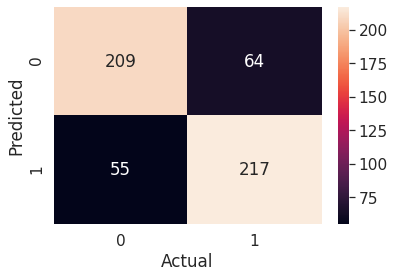

In [43]:
# ACCURACY OF THE BASE MODEL
pred = []
output = [] # store ALL paramters to output array, then convert to csv for easier read
with torch.no_grad():
  for item in input_test_set:
    temp = item.tolist()
    y_pred = model(item)
    pred.append(np.round(y_pred).item())
    
    temp.append(np.round(y_pred).item())
    temp.append(y_pred.item())
    output.append(temp) 
    #print(temp)
 
cm = confusion_matrix(labels_test_set, pred)

df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot = True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

final_acc = accuracy_score(labels_test_set, pred)
print("Final accuracy of baseline model: ", final_acc)

In [44]:
# As we see, this model makes a lot of false positive predictions, this may be due to the fact that the model is less exposed to diabetic patients in the training set.

In [45]:
# Functions to stylize table
def highlight_table(s):
  return ['background-color: red' if x==1 else 'background-color: lightgreen' for x in s]

In [46]:
# Saves results of tester to csv file
header = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'Pedigree', 'Age', 'Predicted', 'Predicted (Raw)']
df4 = pd.DataFrame(output)
df4.columns = header
#csv_data = df2.to_csv('output_results.csv', index=False)

In [47]:
# for use in jupyter notebook only (does not print correctly in colab)
df4.style.apply(highlight_table, subset=['Predicted']).set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Predicted,Predicted (Raw)
0,0.00,137.00,70.00,38.00,0.00,33.20,0.17,22.00,0.00,0.44
1,2.00,105.00,80.00,45.00,191.00,33.70,0.71,29.00,0.00,0.35
2,13.00,126.00,90.00,0.00,0.00,43.40,0.58,42.00,1.00,0.74
3,3.00,107.00,62.00,13.00,48.00,22.90,0.68,23.00,0.00,0.41
4,3.00,193.00,70.00,31.00,0.00,34.90,0.24,25.00,1.00,0.77
5,9.00,165.00,88.00,0.00,0.00,30.40,0.30,49.00,1.00,0.71
6,5.00,144.00,82.00,26.00,285.00,32.00,0.45,58.00,1.00,0.55
7,2.00,102.00,86.00,36.00,120.00,45.50,0.13,23.00,0.00,0.34
8,8.00,107.00,80.00,0.00,0.00,24.60,0.86,34.00,0.00,0.49
9,2.00,158.00,90.00,0.00,0.00,31.60,0.81,66.00,1.00,0.54


**THE FOLLOWING IS THE CODE FOR OUR MODEL WHICH WILL BE TRAINED AND TESTED ON THE BALANCED DATASET**

In [48]:
class diabetes_detection(nn.Module):
  def __init__(self, input_size, output_size,L1size,L2size,L3size):
    super(diabetes_detection, self).__init__()
    self.linear = nn.Sequential(nn.BatchNorm1d(input_size),
                                nn.Linear(input_size, L1size), 
                                nn.Sigmoid(),
                                nn.Linear(L1size, L2size),
                                nn.Sigmoid(),
                                nn.Linear(L2size, L3size),
                                nn.Sigmoid(),
                                nn.Linear(L3size, output_size),
                                nn.Sigmoid()
                                )
    
  def forward(self, input):
    output = self.linear(input)
    return output



def train_dd(train_loader, valid_loader, alpha, epochs, network):
  acc_list = [] 
  pres_list = []
  optimizer = torch.optim.Adam(network.parameters(), lr = alpha)
  for epoch in range(epochs):
    epoch_loss = 0
    for i, (X,y) in enumerate(train_loader):
      yHat = network(X)
      loss = torch.nn.BCELoss()(yHat,y.reshape(-1,1))
      epoch_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
    acc_list.append(test_dd(valid_loader, network))
  
    #print('Train Loss: %.3f \t Test Loss: %.3f'%(epoch_loss/i, test_dd(valid_loader, network)))
    #res = results (valid_loader,network)
    #acc_list.append(res['accuracy'])
    #pres_list.append(res['precision'])
  return acc_list

def test_dd(loader,network):
  epoch_loss = 0
  for i, (X,y) in enumerate(loader):
    yHat = network(X)
    loss = torch.nn.BCELoss()(yHat,y.reshape(-1,1))
    epoch_loss += loss.item()
  return epoch_loss/i

def test(data,network):
  error = 0
   
  for i, (X,y) in enumerate(data):
    yHat = network(X)
    if (y == 1 and yHat < 0.5) or (y == 0 and yHat >= 0.5):
      error = error + 1
  return error/len(data)
 


#np.random.shuffle(dataset)
#dataset_length = dataset.shape[0]

# split dataset into 70% training, 15% validation, and 15% testing
#b_train_length and b_valid_length is from earlier dataset processing
x_train = torch.Tensor(balanced_dataset[:b_train_length,:-1])
x_valid = torch.Tensor(balanced_dataset[b_train_length: b_train_length + b_valid_length, :-1])
x_test = torch.Tensor(balanced_dataset[b_train_length + b_valid_length:, :-1])

y_train = torch.Tensor(balanced_dataset[:b_train_length, -1])
y_valid = torch.Tensor(balanced_dataset[b_train_length: b_train_length + b_valid_length, -1])
y_test = torch.Tensor(balanced_dataset[b_train_length + b_valid_length:, -1])

trainset = torch.utils.data.TensorDataset(x_train, y_train)
validset = torch.utils.data.TensorDataset(x_valid, y_valid)
testset = torch.utils.data.TensorDataset(x_test, y_test)

batch_size=50
train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valid_loader = torch.utils.data.DataLoader(validset, batch_size=batch_size, shuffle=True)


accuracy:   0.9908256880733946


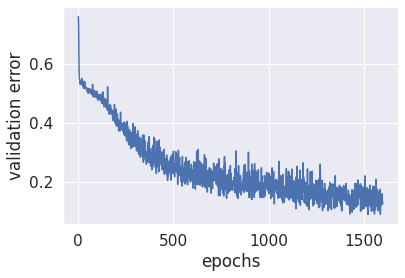

In [49]:

learningRate = 0.001
epochs = 1600

L1size = 60
L2size = 30
L3size = 20

model = diabetes_detection(8,1,L1size,L2size,L3size)
#print(test_dd(train_loader,model))
valid_Error = train_dd(train_loader=train_loader, valid_loader=valid_loader, alpha= learningRate, epochs=epochs, network=model)
predictions = model(x_valid)
accuracy = 0
for i in range (len(predictions)):
  if ( (y_valid[i] == 1 and predictions[i] > 0.5 ) or (predictions[i] < 0.5 and y_valid[i] == 0)):
   accuracy = accuracy + 1
accuracy = accuracy / len(predictions) 

print ('accuracy:  ',  accuracy) 

plt.plot(range(epochs), valid_Error)
plt.ylabel("validation error")
plt.xlabel("epochs")
plt.show()

In [50]:

predictions = model(x_test)
accuracy = 0
for i in range (len(predictions)):
  if ( (y_test[i] == 1 and predictions[i] > 0.5 ) or (predictions[i] < 0.5 and y_test[i] == 0)):
   accuracy = accuracy + 1
accuracy = accuracy / len(predictions) 

print ('test accuracy:  ',  accuracy) 


test accuracy:   0.9798165137614679


In [51]:
results = [] # store ALL paramters to output array, then convert to csv for easier read
results_raw = []
np.array(x_test)
with torch.no_grad():
  for i in range(len(predictions)):
      if predictions[i] < 0.5:
        results.append(0)
      else:
        results.append(1)
      results_raw.append(float(predictions[i]))

In [52]:
final = np.zeros((len(x_test), 10))
final[:,:-2] = x_test
final[:,-2] = results
final[:,-1] = results_raw

Final accuracy of our model:  0.9798165137614679


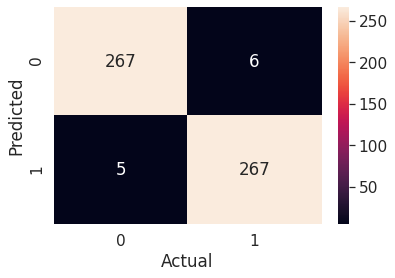

In [53]:
cm = confusion_matrix(labels_test_set, results)

df_cm = pd.DataFrame(cm, range(2), range(2))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot = True, fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

final_acc = accuracy_score(labels_test_set, results)
print("Final accuracy of our model: ", final_acc)

In [54]:
header = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
          'Pedigree', 'Age', 'Predicted', 'Predicted (Raw)']
df5 = pd.DataFrame(final)
df5.columns = header

In [55]:
df5.style.apply(highlight_table, subset=['Predicted']).set_precision(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Predicted,Predicted (Raw)
0,0.00,137.00,70.00,38.00,0.00,33.20,0.17,22.00,0.00,0.02
1,2.00,105.00,80.00,45.00,191.00,33.70,0.71,29.00,1.00,1.00
2,13.00,126.00,90.00,0.00,0.00,43.40,0.58,42.00,1.00,1.00
3,3.00,107.00,62.00,13.00,48.00,22.90,0.68,23.00,1.00,0.99
4,3.00,193.00,70.00,31.00,0.00,34.90,0.24,25.00,1.00,1.00
5,9.00,165.00,88.00,0.00,0.00,30.40,0.30,49.00,1.00,0.88
6,5.00,144.00,82.00,26.00,285.00,32.00,0.45,58.00,1.00,1.00
7,2.00,102.00,86.00,36.00,120.00,45.50,0.13,23.00,1.00,1.00
8,8.00,107.00,80.00,0.00,0.00,24.60,0.86,34.00,1.00,0.74
9,2.00,158.00,90.00,0.00,0.00,31.60,0.81,66.00,1.00,1.00
